## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [51]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
#import the dataset
df= pd.read_html(r"https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv")
data=df[0]
data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,NaN,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,NaN,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,NaN,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,NaN,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,NaN,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,NaN,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,NaN,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Dropping Unnamed: 0 column which is full of null values

In [53]:
#dropping the column
data.drop(columns='Unnamed: 0',inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
#shape of the dataset
shape=data.shape
print(shape)

(614, 13)


In [55]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in the dataset. some variables need to be encoded.

In [56]:
#checking if there's any missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self_employed, LoanAmount, Loan_amound_term, Credit_history. These variables have missing values. Since some of them are categorical data imputing these missing values may lead to bias. thus dropping these observations.

In [57]:
data.Gender.mode()[0]

'Male'

In [58]:
#filling the missing values in the dataset with its respective method
#filling the categorical data with the most frequent value in those observation
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0],inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0],inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)

#filling missing values with median in numercial variable
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

#checking if there's still any missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values in the dataset.

Y    422
N    192
Name: Loan_Status, dtype: int64


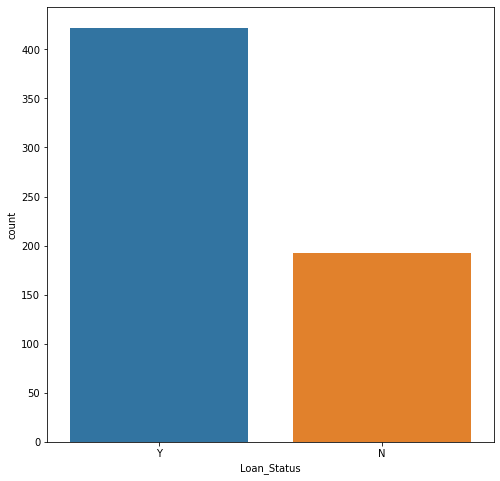

In [59]:
#checking if there's imbalance in the target varibale
print(data.Loan_Status.value_counts())
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(x='Loan_Status',data=data)
plt.show()

The target varibalesm "Loan Status" has,

- No 148
- Yes 332

Our dataset is imbalanced.So, if we build the model based on this observatins. our model will be biased. Thus we need to make the dataset balanced.

In [60]:
#descriptive statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- Loan_ID is just for reference purpose it does not give any insights in predicting the loan status. Removing this column from the datset.

In [61]:
#dropping the column
data.drop(columns='Loan_ID',inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [63]:
#splitting the numercial, categorical features
numerical_data= data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
categorical_data=pd.DataFrame()
for column in data.columns:
    if column not in numerical_data:
        
        categorical_data[column]= data[column]
categorical_data.drop(columns='Loan_Status',inplace=True)        
print(f'Numerical features:\n{numerical_data.columns}\n\n\ncategorical features:\n{categorical_data.columns}')

Numerical features:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')


categorical features:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


Male      502
Female    112
Name: Gender, dtype: int64


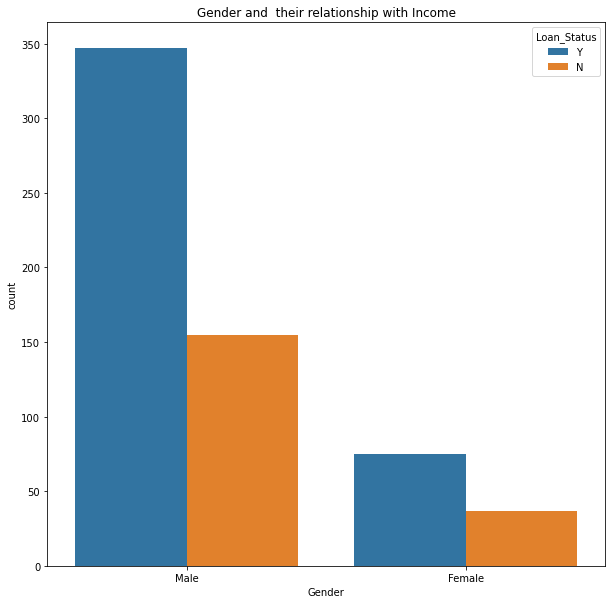

In [64]:
#seeing the number of classes in each categorical variables using countplot
#also the relationship between each variable with Loan status
plt.figure(figsize=(10,10),facecolor='white')
print(data.Gender.value_counts())
sns.countplot(x='Gender',hue='Loan_Status',data=data)
plt.title('Gender and  their relationship with Income')
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


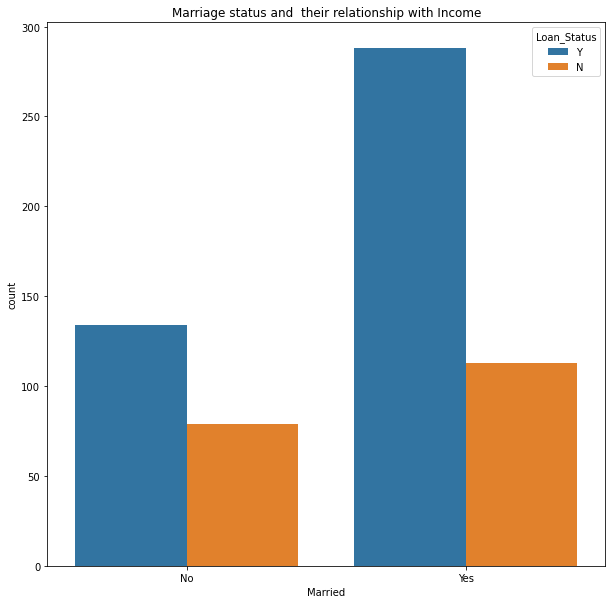

In [65]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Married.value_counts())
sns.countplot(x='Married',hue='Loan_Status',data=data)
plt.title('Marriage status and  their relationship with Income')
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


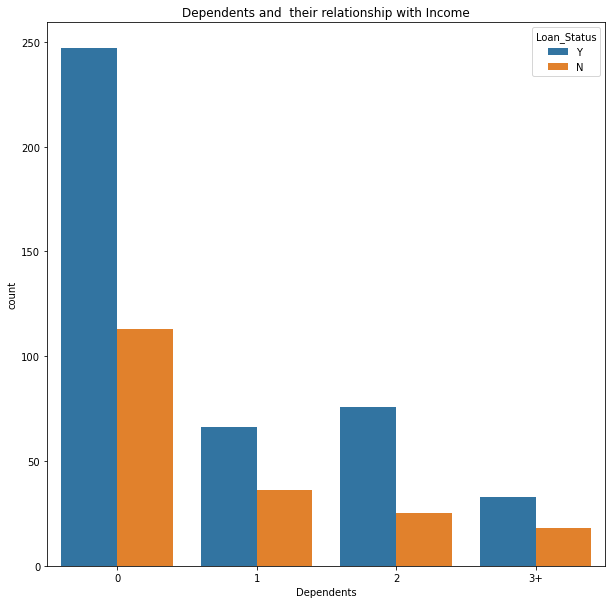

In [66]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Dependents.value_counts())
sns.countplot(x='Dependents',hue='Loan_Status',data=data)
plt.title('Dependents and  their relationship with Income')
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


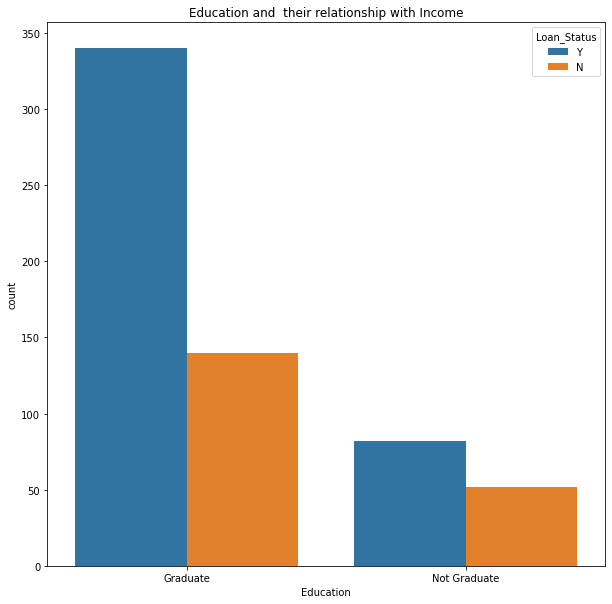

In [67]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Education.value_counts())
sns.countplot(x='Education',hue='Loan_Status',data=data)
plt.title('Education and  their relationship with Income')
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


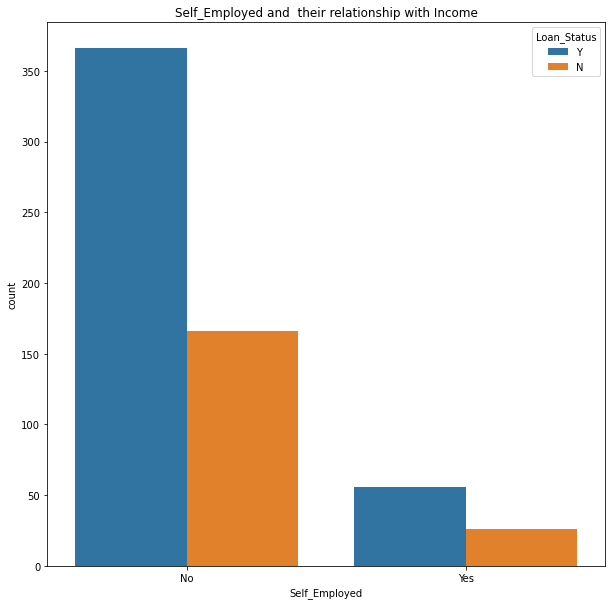

In [68]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Self_Employed.value_counts())
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)
plt.title('Self_Employed and  their relationship with Income')
plt.show()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


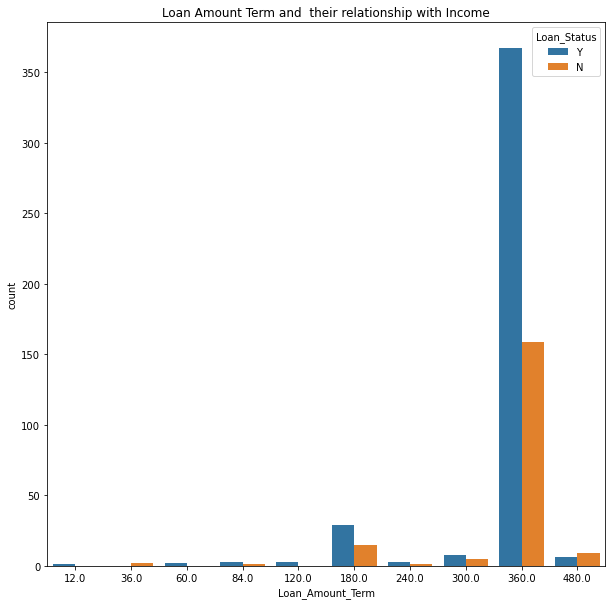

In [69]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Loan_Amount_Term.value_counts())
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=data)
plt.title('Loan Amount Term and  their relationship with Income')
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


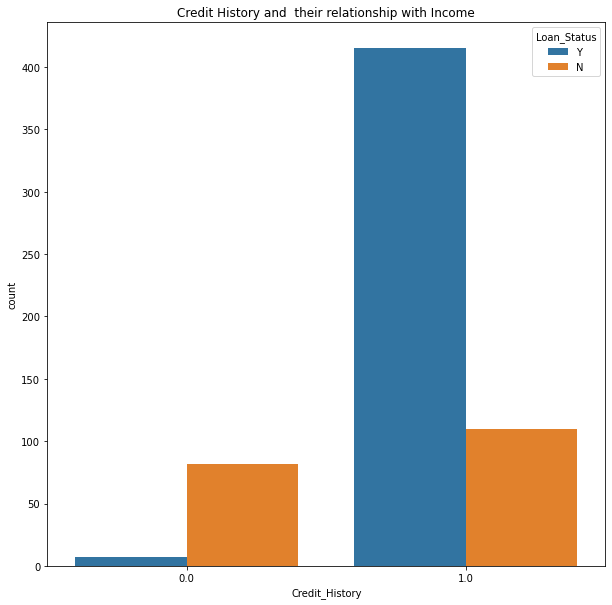

In [70]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Credit_History.value_counts())
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)
plt.title('Credit History and  their relationship with Income')
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


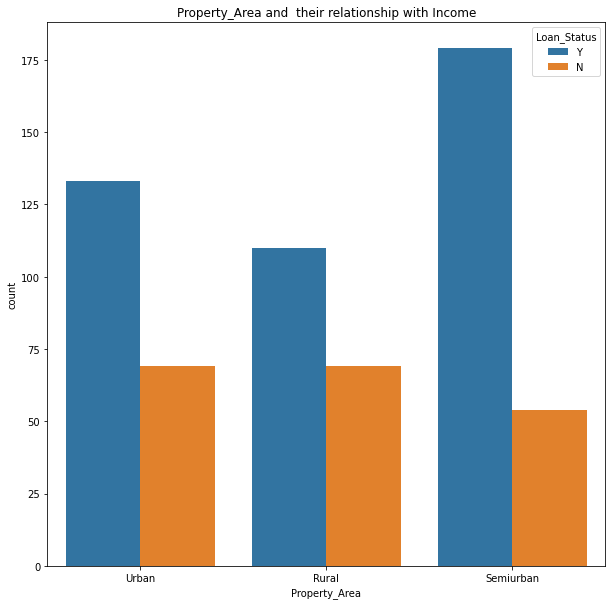

In [71]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Property_Area.value_counts())
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)
plt.title('Property_Area and  their relationship with Income')
plt.show()

Observation:

The Loan are mostly approved to those who meet the below conditions.
- A person should be married
- A person should have dependents 0
- A person should be educated
- A person should not be self employed
- A person should have a credit history of 1
- A person should posses a property.

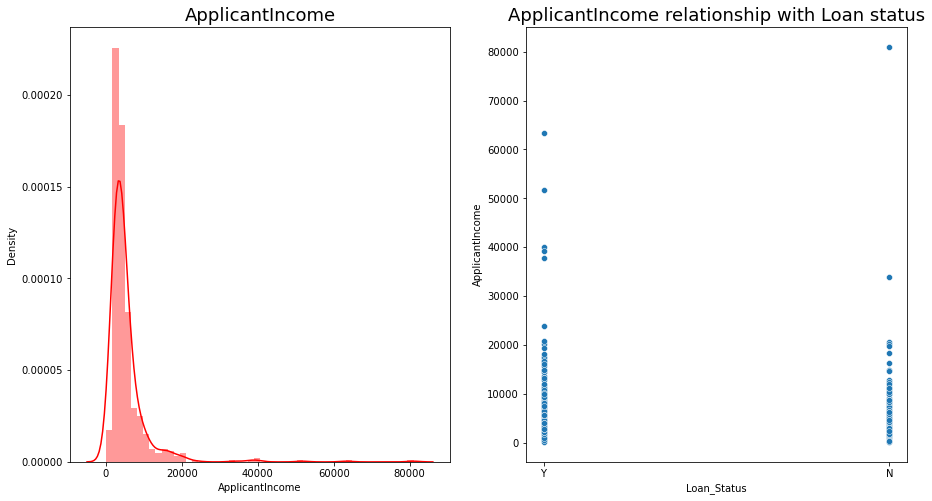

In [72]:
#seeing the data distribution of numerical variables 
plt.figure(figsize=(15,8),facecolor='white')
plt.subplot(1,2,1)
sns.distplot(data.ApplicantIncome,color='red')
plt.title("ApplicantIncome",fontsize=18)
plt.subplot(1,2,2)
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',data=data)
plt.title("ApplicantIncome relationship with Loan status",fontsize=18)
plt.show()

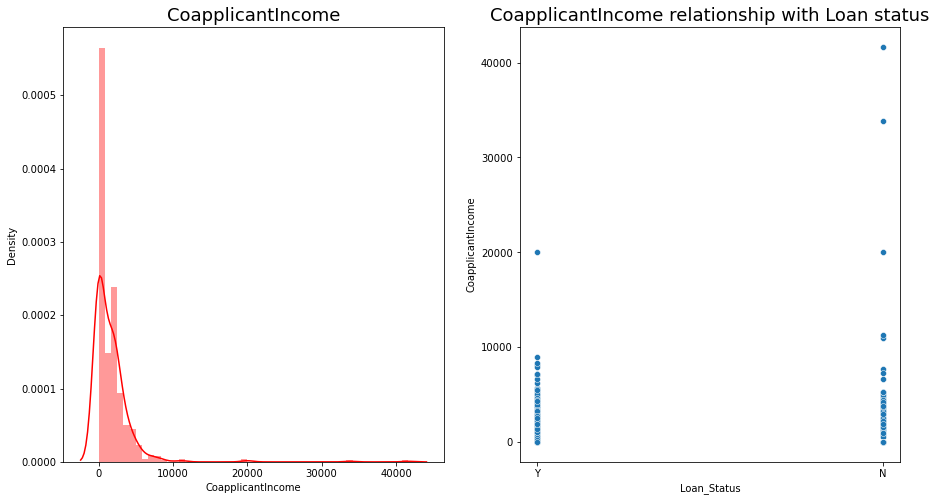

In [73]:
plt.figure(figsize=(15,8),facecolor='white')
plt.subplot(1,2,1)
sns.distplot(data.CoapplicantIncome,color='red')
plt.title("CoapplicantIncome",fontsize=18)
plt.subplot(1,2,2)
sns.scatterplot(x='Loan_Status',y='CoapplicantIncome',data=data)
plt.title("CoapplicantIncome relationship with Loan status",fontsize=18)
plt.show()

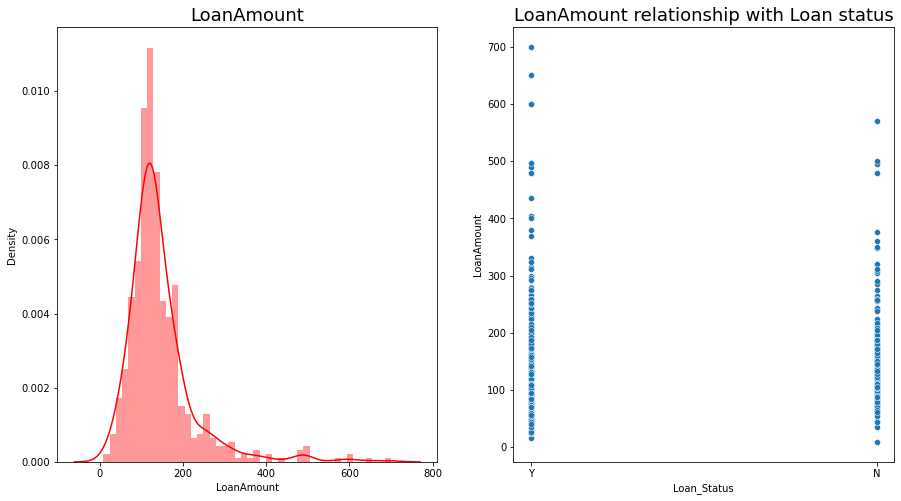

In [74]:
plt.figure(figsize=(15,8),facecolor='white')
plt.subplot(1,2,1)
sns.distplot(data.LoanAmount,color='red')
plt.title("LoanAmount",fontsize=18)
plt.subplot(1,2,2)
sns.scatterplot(x='Loan_Status',y='LoanAmount',data=data)
plt.title("LoanAmount relationship with Loan status",fontsize=18)
plt.show()

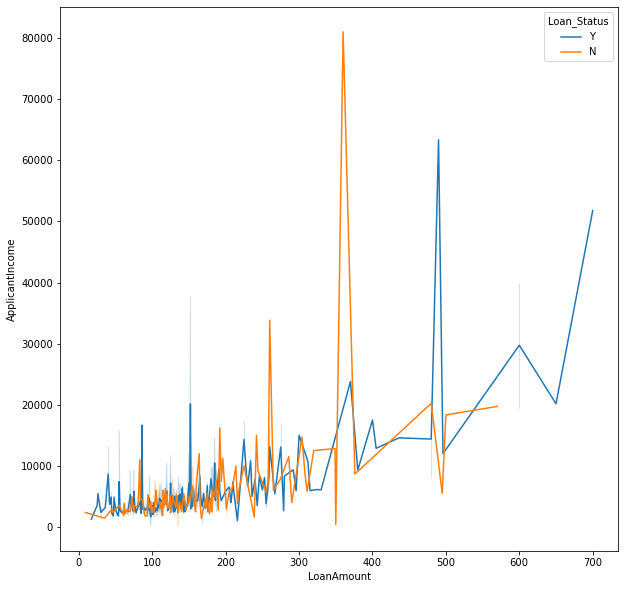

In [75]:
plt.figure(figsize=(10,10),facecolor='white')
sns.lineplot(x='LoanAmount',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.show()

As you can see huge loan amount are approved while the applicantincome is high and vice versa.

In [76]:
#converting the categorical variables into binomial & numerical variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for column in data.columns:
    if data[column].dtype==object:
        data[column]=encoder.fit_transform(data[column])

In [77]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

All categorical variables has been encoded.

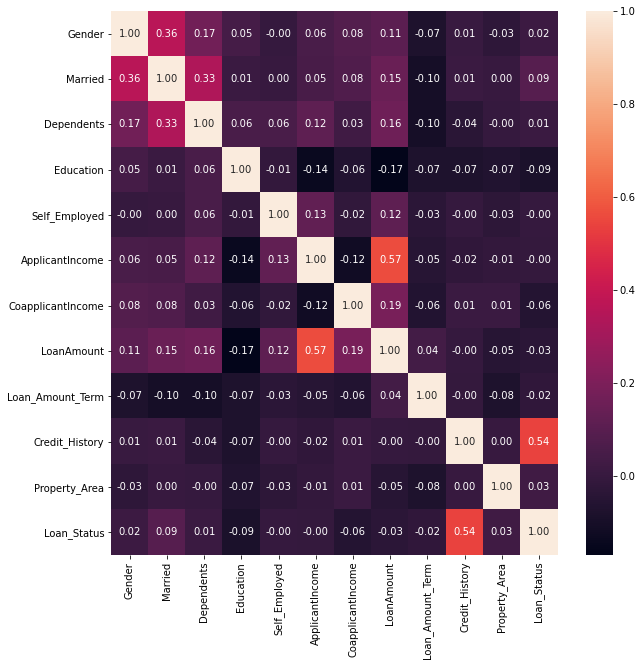

In [78]:
#checking the multicollinearity between the features
corr_data= data.corr()

plt.figure(figsize=(10,10),facecolor='white')
sns.heatmap(corr_data,annot=True,fmt='.2f')
plt.show()

- Credit history is higly positively correlted with the target variable Loan status
- Loan amount and Applicant Income is higly positively correlated amoung other variables.


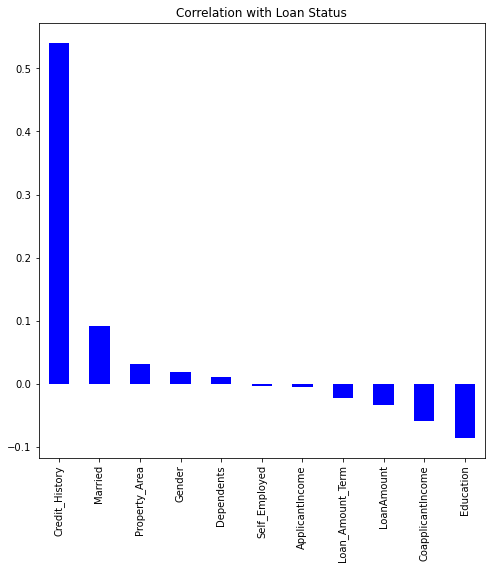

In [79]:
#correlation with the target
plt.figure(figsize=(8,8),facecolor='white')
corr_data.Loan_Status.sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b',title='Correlation with Loan Status')
plt.show()

In [80]:
#checking skewness in the numerical variables
numerical_data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
dtype: float64

We need to reduce the skewness with power transformer technique

In [81]:
from sklearn.preprocessing import power_transform
numerical_data= pd.DataFrame(power_transform(numerical_data), columns=numerical_data.columns)
for column in numerical_data.columns:
    data[column]=numerical_data[column]

In [82]:
numerical_data.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
dtype: float64

Skewness has been reduced.

In [83]:
#checking outliers in the dataset 
from scipy.stats import zscore
index= data[np.abs(zscore(numerical_data))>3].index
print(data.shape,'Before removing the outliers')
data.drop(index=index,inplace=True)
print(data.shape,'After removing the outliers')

(614, 12) Before removing the outliers
(595, 12) After removing the outliers


In [84]:
#percentage of dataset lost
print(f'{(((shape[0])-(data.shape[0]))/(shape[0]))*100}% of the datset has been removed due to oultiers.')

3.0944625407166124% of the datset has been removed due to oultiers.


Building the Model

In [178]:
#splitting the dataset
x= data.drop(columns='Loan_Status')
y=data.Loan_Status

In [179]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [180]:
#splitting the dataset into train and test with the best random state
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [181]:
#Synthetic Minority Oversampling Technique for imbalanced dataset
from imblearn.over_sampling import SMOTE
imb= SMOTE(0.75)
x_train,y_train= imb.fit_resample(x_train,y_train)

In [182]:
#selecting the best k-fold for cross validation score
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.8067475651368269
At cross fold 3 cross value score is 0.8016767338375379
At cross fold 4 cross value score is 0.8067295483402867
At cross fold 5 cross value score is 0.8100840336134454
At cross fold 6 cross value score is 0.8134343434343435
At cross fold 7 cross value score is 0.8117647058823528
At cross fold 8 cross value score is 0.8101576576576577
At cross fold 9 cross value score is 0.8117744610281924


Selecting 5 as the k fold value for cross validation.

In [183]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8523489932885906
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8100840336134454
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 22  19]
 [  3 105]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        41
           1       0.85      0.97      0.91       108

    accuracy                           0.85       149
   macro avg       0.86      0.75      0.79       149
weighted avg       0.86      0.85      0.84       149



In [184]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8322147651006712
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7899159663865546
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 24  17]
 [  8 100]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        41
           1       0.85      0.93      0.89       108

    accuracy                           0.83       149
   macro avg       0.80      0.76      0.77       149
weighted avg       0.83      0.83      0.83       149



In [185]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7046979865771812
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.707563025210084
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[24 17]
 [27 81]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        41
           1       0.83      0.75      0.79       108

    accuracy                           0.70       149
   macro avg       0.65      0.67      0.65       149
weighted avg       0.73      0.70      0.71       149



In [186]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8187919463087249
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.776470588235294
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[23 18]
 [ 9 99]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.56      0.63        41
           1       0.85      0.92      0.88       108

    accuracy                           0.82       149
   macro avg       0.78      0.74      0.76       149
weighted avg       0.81      0.82      0.81       149



In [187]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7315436241610739
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.6857142857142857
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[  1  40]
 [  0 108]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.73      1.00      0.84       108

    accuracy                           0.73       149
   macro avg       0.86      0.51      0.45       149
weighted avg       0.80      0.73      0.62       149



<Figure size 720x720 with 0 Axes>

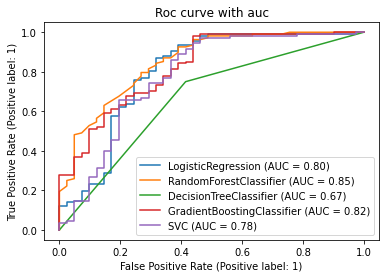

In [188]:
#plotting Roc curve and auc to finding the best model
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plt.title('Roc curve with auc')
plt.show()

We will do hyperparameter tuning for the Random Forest Classifier because it has the highest area under the curve 85% and accuracy of 84% when compared with the other models.

In [190]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [202]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

rf= RandomForestClassifier()
param= {"n_estimators":[5,50,100],
        "max_depth":[3,5,10,13],
        "criterion":['gini','entropy'],
        "min_samples_leaf":[2,3,5,7],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(rf,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

rf= grp.best_estimator_

rf.fit(x_train,y_train)

#predict
y_pred= rf.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.8523489932885906
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[ 22  19]
 [  3 105]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        41
           1       0.85      0.97      0.91       108

    accuracy                           0.85       149
   macro avg       0.86      0.75      0.79       149
weighted avg       0.86      0.85      0.84       149



**The Model gives accuracy score of 85%, which is good improvement. Saving the Trained model.**

In [203]:
#saving our trained model
import pickle
pickle.dump(gb,open('Loan_Status_prediction.pkl','wb'))